## Module import

In [1]:
# 기본 패키지
import pandas as pd

# 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 
plt.style.use(['ggplot'])

# 한글 시각화시 필요 모듈
import platform # 사용자 운영체제 확인
platform.system()
## 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
## 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'


# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 


# 버전 확인
print('Pandas : %s'%(pd.__version__))
print('seaborn : %s'%(sns.__version__))
print('matplotlib : %s'%(matplotlib.__version__))
!python --version

Pandas : 1.4.3
seaborn : 0.11.2
matplotlib : 3.5.1
Python 3.8.8


## Load Data

In [2]:
loan = pd.read_csv('../data/loan_result.csv')
log = pd.read_csv('../data/log_data.csv')
user = pd.read_csv('../data/user_spec.csv')

## 데이터 병합

In [3]:
# train에 신청서 id가 있으나 user에 없는 데이터 지우고 진행
df = pd.merge(loan, user, on='application_id')

In [4]:
df.to_csv('../data/data.csv', index = False)

In [5]:
data = pd.read_csv('../data/data.csv')

In [6]:
data

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,430982,1996.0,1.0,...,EARNEDINCOME,20220201.0,정규직,자가,25000000.0,대환대출,0.0,0.0,2.0,15000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13527245,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN,478802,1965.0,1.0,...,EARNEDINCOME,20190301.0,정규직,기타가족소유,50000000.0,대환대출,0.0,NaN,2.0,56000000.0
13527246,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN,478802,1965.0,1.0,...,EARNEDINCOME,20190301.0,정규직,기타가족소유,50000000.0,대환대출,0.0,NaN,2.0,56000000.0
13527247,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN,478802,1965.0,1.0,...,EARNEDINCOME,20190301.0,정규직,기타가족소유,50000000.0,대환대출,0.0,NaN,2.0,56000000.0
13527248,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN,478802,1965.0,1.0,...,EARNEDINCOME,20190301.0,정규직,기타가족소유,50000000.0,대환대출,0.0,NaN,2.0,56000000.0


## 데이터 확인

- loan_result

In [8]:
# 0, 1 값의 분포를 확인
loan['is_applied'].value_counts()

0.0    9709675
1.0     560449
Name: is_applied, dtype: int64

In [9]:
# 대출 신청 여부가 '0'인 기록이 94%임
loan['is_applied'].value_counts()[0] / (loan['is_applied'].value_counts()[1] + loan['is_applied'].value_counts()[0])

0.9454291885862333

In [10]:
# 예측해야하는 라벨인 대출 여부의 na값을 확인해본 결과 24%의 데이터가 na값을 가짐
## -> na값의 한도조회일시의 월이 6월인 것을 보아 예측해야하는 것으로 추정 ( 맞는듯 )
loan['is_applied'].isna().sum() / len(loan['is_applied'])

0.24078891059550928

    - train과 test로 나누어 EDA진행

In [11]:
train_loan = loan[loan['is_applied'].isna() == False].reset_index(drop=True)
test_loan = loan[loan['is_applied'].isna()].reset_index(drop=True)

In [12]:
# 핀다 앱에서 상세설정을 걸고 조회하면 여러 은행의 대출 상품과 가능 여부가 나오는 구조인듯한 모습
## -> 즉, 고객 하나당 하나의 예측값만이 존재하는 것은 아닌듯 : index를 key로 잡고 예측해야될듯함
## 아래에서 예시 확인 가능
train_loan[train_loan['application_id'] == 540364].sort_values(by='loanapply_insert_time')

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
10270100,540364,2022-05-16 11:09:01,33,110,6000000.0,17.9,0.0
10270098,540364,2022-05-16 11:09:02,37,206,7000000.0,19.9,0.0
10270099,540364,2022-05-16 11:09:02,54,235,12000000.0,18.5,0.0
10270101,540364,2022-05-16 11:09:02,22,221,10000000.0,18.4,0.0


In [13]:
# 최종적으로 대출신청 결과를 예측할 
# test에 있는 user중 train에도 있는 user의 수는 80명 -> 80명은 보다 정확한 예측이 가능할 것으로 보임
# 총 test의 고객 239949명 중 80명임
train_loan[train_loan['application_id'].isin(test_loan['application_id'].unique())]['application_id'].nunique()

80

In [14]:
# train_loan에 기록이 있는 신청서와 user 비교
# 기록이 있는 신청서는 728997인데 해당 회원중 user data에 정보가 있는 신청서는 72884명 뿐
## 즉, 113명은 user에 기록이 없음 -> 모델을 학습시킬 때, 정보가 없는 행을 어떻게 처리할지에 대한 고민 필요
## -> 기록이 없는 고객은 데이터 병합시 na값이기 때문에 지울지 '없음'으로 채울지 고민 필요
print(f"train: {train_loan['application_id'].nunique()}\nuser: {len(user[user['application_id'].isin(train_loan['application_id'].unique())])}")

train: 728997
user: 728884


In [15]:
# test는 모든 신청서의 정보가 user data에 있음
print(f"test: {test_loan['application_id'].nunique()}\nuser: {len(user[user['application_id'].isin(test_loan['application_id'].unique())])}")

test: 239949
user: 239949


In [65]:
# loan에는 있으나 user에는 없는 113명의 정보에 대한 확인 필요
loan[loan['application_id'].isin(user['application_id'].unique()) == False]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
68010,2015764,2022-04-29 15:16:36,27,193,NaN,NaN,1.0
615673,1669381,2022-03-01 18:03:44,14,197,NaN,NaN,1.0
1694465,351899,2022-04-18 14:00:08,1,61,NaN,NaN,1.0
2978297,1382876,2022-03-01 18:02:54,14,197,NaN,NaN,1.0
3125384,2061284,2022-05-04 10:03:07,1,61,NaN,NaN,1.0
...,...,...,...,...,...,...,...
13373186,197821,2022-03-02 10:29:03,13,262,NaN,NaN,1.0
13386339,398321,2022-03-02 15:17:30,10,149,NaN,NaN,1.0
13387297,1872250,2022-03-02 11:01:23,34,57,NaN,NaN,1.0
13403453,2052437,2022-03-02 17:24:59,30,121,NaN,NaN,1.0


In [9]:
# train은 총 62개 은행의 대출상품 178개에 대한 정보임
print('train')
print(f"bank: {train_loan['bank_id'].nunique()}\nproduct: {train_loan['product_id'].nunique()}")
# test은 총 61개 은행의 대출상품 169개에 대한 정보임
print('test')
print(f"bank: {test_loan['bank_id'].nunique()}\nproduct: {test_loan['product_id'].nunique()}")
## -> 은행과 상품이 상이할 수 있음 : 아래에서 확인

train
bank: 62
product: 178
test
bank: 61
product: 169


In [10]:
# 예측해야하는 test의 은행중 train에 없는, test에만 있는 은행은 id 48 은행 하나
test_loan[test_loan['bank_id'].isin(train_loan['bank_id']) == False]['bank_id'].unique()

array([48], dtype=int64)

In [11]:
# 예측해야하는 test의 상품 train에 없는, test에만 있는 상품은 10개가 존재
test_loan[test_loan['product_id'].isin(train_loan['product_id']) == False]['product_id'].unique()

array([178, 202, 102, 101,   4, 130, 201, 241,  33,  64], dtype=int64)

- user_spec
    - 가볍게 분포만 확인 후, 데이터 병합하고 train, test 나눠서 더 구체적으로 확인

In [12]:
# na값 존재 확인
user.isna().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [13]:
# 신청서 정보가 PK임 -> 신청서 정보는 겹치는 데이터가 없음
# user 405213명의 대출 신청 기록 데이터임 ( user별로 여려개의 대출신청여부 파악이 가능 )
## -> 즉, 예측모델 생성시 key를 index로 잡아야함
## -> 단, 405213명 중 inert_time열이 6월인 데이터는 test데이터이기 때문에 제외 필요 ( 어차피 병합후 진행하면 알아서 잘릴듯함 )
user.groupby('user_id').count().shape[0]

405213

In [14]:
# user가 다른 대출상품 조회를 한 경우 순수한 user의 정보는 중복해서 나타남을 알 수 있음
## ex) birth_year, gender, credit_score 등
## 아래에서 예시 확인 가능
user[user['user_id'] == 1]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
1290534,1031304,1,2000.0,1.0,2022-05-03 14:51:00,750.0,20000000.0,OTHERINCOME,NaN,기타,전월세,0.0,생활비,0.0,NaN,1.0,NaN
1290535,1767402,1,2000.0,1.0,2022-05-03 14:53:33,750.0,20000000.0,OTHERINCOME,NaN,기타,전월세,1000000.0,생활비,0.0,NaN,1.0,NaN


In [25]:
# 고객별 대출 신청 횟수를 사분위수를 이용하여 확인
## 대부분의 고객들이 5회 미만의 거래횟수를 나타냄
user.groupby('user_id')['application_id'].count().describe()

count    405213.000000
mean          3.440699
std           5.825759
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         840.000000
Name: application_id, dtype: float64

    - user들의 순수 분포 확인을 위하여 데이터 가공

In [16]:
# 시간이 지나도 변하지 않는 정보들만 가져옴
## 결측치가 있는 행은 지운 후 정보를 추출
## -> 똑같은 userid인데도 어떤 행은 정보가 있고, 어떤 행은 na인 경우가 존재 -> 후처리 필요
user_info = user.dropna(subset=['birth_year', 'gender'])[['user_id', 'birth_year', 'gender']].drop_duplicates(subset='user_id', ignore_index=True)
user_info.head(3)

,user_id,birth_year,gender
0,118218,1985.0,1.0
1,553686,1968.0,1.0
2,59516,1997.0,1.0


In [17]:
# 전체 고객대비 가공한 데이터의 user수가 적음
## -> 즉, userid는 가지고 있으나 출생년도와 성별에 대한 정보가 없는 고객이 6856명 존재함
## -> 후처리 이후에도 정보가 없는 고객에 대한 처리를 어떻게 해야할지에 대한 고민 필요
print(f"전체 user의 수: {user['user_id'].nunique()} \n정보가 모두 있는 사람: {user_info['user_id'].nunique()}") 

전체 user의 수: 405213 
정보가 모두 있는 사람: 398357


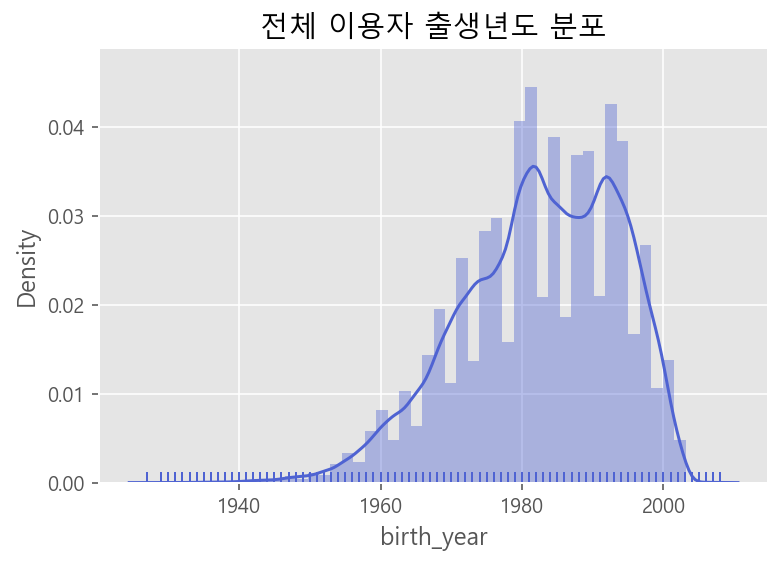

In [48]:
# 출생년도 분포를 시각화하여 확인
## 1980-2000년 사이의 고객들이 많은 형태를 보임
sns.distplot(user_info['birth_year'],kde = True, rug=True, color='#4F63D2')
plt.title('전체 이용자 출생년도 분포')
plt.show()

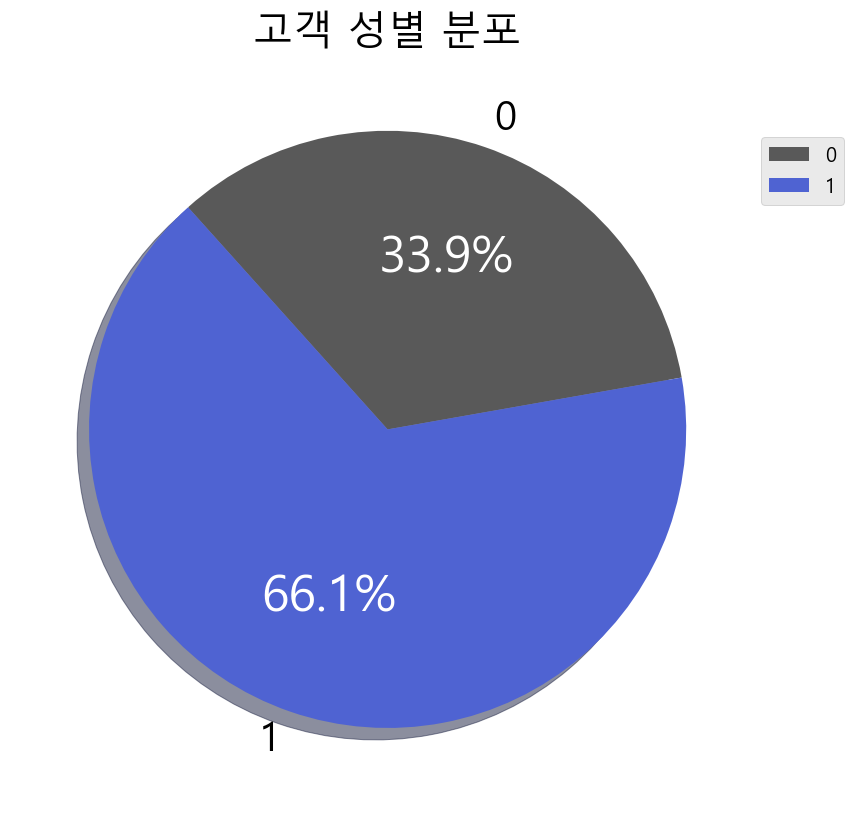

In [45]:
# 고객의 성별을 그래프를 통해 확인
## -> 1인 성별이 66%로 많은 모습을 보임
plt.figure(figsize=(6,6))
patches, texts, autotexts = plt.pie(
    user_info.groupby('gender').count()['user_id'],
    labels = ['0', '1'],
    startangle=10,## 어디에서 시작할지, 정해줌  
    shadow=True, ##그림자 
    autopct='%1.1f%%', ## pi 위에 표시될 글자 형태, 또한 알아서 %로 변환해서 알려줌 
    colors=['#595959', '#4F63D2'] # 핀다( finda ) 색상
)
plt.title('고객 성별 분포', size = 20)
plt.legend(loc = (1, 0.8), fontsize=10)

for t in autotexts:
    t.set_color("white")
    t.set_fontsize(25)

for t in texts:
    t.set_fontsize(20)
plt.tight_layout()
plt.show()

- log_data

    전체적으로 흘러가는 Process:
    1. log 데이터에서 고객이 ViewLoanApplyIntro - CompleteIDCertification 단계를 거침
    2. user 데이터에 새로운 application_id로 application이 생성됨
    3. loan 데이터에서 결과 확인 가능
    
    -> 아래에서 예시를 확인

In [106]:
# '한도조회 인트로 페이지 조회 - 본인인증 완료'의 단계를 거쳐 대출 승인여부를 판단 가능
log[(log['user_id'] == 777860) & (log['date_cd'] == '2022-05-06')].sort_values(by='timestamp')

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
2595488,777860,OpenApp,2022-05-06 11:03:58,iOS,3.10.1,2022-05-06
2595489,777860,StartLoanApply,2022-05-06 11:04:08,iOS,3.10.1,2022-05-06
2595490,777860,ViewLoanApplyIntro,2022-05-06 11:04:08,iOS,3.10.1,2022-05-06
2595491,777860,CompleteIDCertification,2022-05-06 11:05:28,iOS,3.10.1,2022-05-06
2595492,777860,EndLoanApply,2022-05-06 11:07:18,iOS,3.10.1,2022-05-06
2595496,777860,StartLoanApply,2022-05-06 11:09:00,iOS,3.10.1,2022-05-06
2595497,777860,EndLoanApply,2022-05-06 11:09:01,iOS,3.10.1,2022-05-06


In [104]:
# 위의 단계가 진행되면 새로운 신청서가 생성됨
user[user['application_id'] == 1]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
535078,1,777860,1990.0,1.0,2022-05-06 11:05:42,580.0,40000000.0,EARNEDINCOME,201702.0,정규직,전월세,30000000.0,대환대출,0.0,0.0,NaN,NaN


In [105]:
# 최종적으로 승인 여부를 확인하는 것이 가능함
## 하나의 신청서에서 하나의 대출 상품을 보는 경우도 있지만
## 아래와 같이 여러개의 상품에 대한 대출 승인 여부를 확인하는 것이 가능함
## 데이터를 병합할 때, 주의해야할듯함
loan[loan['application_id'] == 1]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
10972627,1,2022-05-06 11:05:57,62,200,8000000.0,14.8,0.0
10972628,1,2022-05-06 11:05:56,38,16,19000000.0,17.1,0.0
10972629,1,2022-05-06 11:05:43,38,223,19000000.0,17.1,0.0
10972630,1,2022-05-06 11:05:44,37,206,32000000.0,18.9,0.0
10972631,1,2022-05-06 11:05:43,50,142,18000000.0,19.9,0.0
10972632,1,2022-05-06 11:05:42,59,150,19000000.0,17.7,0.0


In [127]:
# log는 5가지 종류로 이루어져있음
## -> 대소문자에 따른 차이가 있는지 확인 후 어떻게 할지 생각해야할듯
## -> 단순 os이기 때문에 안드로이드와 ios두가지로 해도 될듯함
## 추가로, na값 어떻게 채울지 고민
log['mp_os'].unique()

array(['Android', 'iOS', 'iPadOS', 'android', nan], dtype=object)

# -ing